## **Seoul Bike Count Prediction**


## **Importing Libraries**

In [4]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
sns.set(style='white', color_codes=True)
import warnings
warnings.filterwarnings('ignore')

%matplotlib inline

## **Importing data and overview**

In [5]:
dataset = pd.read_csv('SeoulBikeData.csv')
print("Dimension of dataset", dataset.shape)

Dimension of dataset (8760, 14)


In [6]:
dataset.head()

,Date,Rented Bike Count,Hour,Temperature(C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day
0,01/12/2017,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
1,01/12/2017,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
2,01/12/2017,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,No Holiday,Yes
3,01/12/2017,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
4,01/12/2017,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,Winter,No Holiday,Yes


In [7]:
dataset.describe()

,Rented Bike Count,Hour,Temperature(C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm)
count,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000
mean,704.602055,11.500000,12.882922,58.226256,1.724909,1436.825799,4.073813,0.569111,0.148687,0.075068
std,644.997468,6.922582,11.944825,20.362413,1.036300,608.298712,13.060369,0.868746,1.128193,0.436746
min,0.000000,0.000000,-17.800000,0.000000,0.000000,27.000000,-30.600000,0.000000,0.000000,0.000000
25%,191.000000,5.750000,3.500000,42.000000,0.900000,940.000000,-4.700000,0.000000,0.000000,0.000000
50%,504.500000,11.500000,13.700000,57.000000,1.500000,1698.000000,5.100000,0.010000,0.000000,0.000000
75%,1065.250000,17.250000,22.500000,74.000000,2.300000,2000.000000,14.800000,0.930000,0.000000,0.000000
max,3556.000000,23.000000,39.400000,98.000000,7.400000,2000.000000,27.200000,3.520000,35.000000,8.800000


In [8]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 14 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Date                      8760 non-null   object 
 1   Rented Bike Count         8760 non-null   int64  
 2   Hour                      8760 non-null   int64  
 3   Temperature(C)            8760 non-null   float64
 4   Humidity(%)               8760 non-null   int64  
 5   Wind speed (m/s)          8760 non-null   float64
 6   Visibility (10m)          8760 non-null   int64  
 7   Dew point temperature(C)  8760 non-null   float64
 8   Solar Radiation (MJ/m2)   8760 non-null   float64
 9   Rainfall(mm)              8760 non-null   float64
 10  Snowfall (cm)             8760 non-null   float64
 11  Seasons                   8760 non-null   object 
 12  Holiday                   8760 non-null   object 
 13  Functioning Day           8760 non-null   object 
dtypes: float

# **Checking for Missing values**

In [9]:
miss_val = dataset.isna().sum()
miss_val

Date                        0
Rented Bike Count           0
Hour                        0
Temperature(C)              0
Humidity(%)                 0
Wind speed (m/s)            0
Visibility (10m)            0
Dew point temperature(C)    0
Solar Radiation (MJ/m2)     0
Rainfall(mm)                0
Snowfall (cm)               0
Seasons                     0
Holiday                     0
Functioning Day             0
dtype: int64

### **Checking and Removing Outliers**

In [10]:
dataset_numeric = dataset.select_dtypes(include=['float64', 'int64'])
dataset_numeric

,Rented Bike Count,Hour,Temperature(C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm)
0,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0
1,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0
2,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0
3,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0
4,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...
8755,1003,19,4.2,34,2.6,1894,-10.3,0.0,0.0,0.0
8756,764,20,3.4,37,2.3,2000,-9.9,0.0,0.0,0.0
8757,694,21,2.6,39,0.3,1968,-9.9,0.0,0.0,0.0
8758,712,22,2.1,41,1.0,1859,-9.8,0.0,0.0,0.0


In [11]:
dataset_numeric.columns

Index(['Rented Bike Count', 'Hour', 'Temperature(C)', 'Humidity(%)',
       'Wind speed (m/s)', 'Visibility (10m)', 'Dew point temperature(C)',
       'Solar Radiation (MJ/m2)', 'Rainfall(mm)', 'Snowfall (cm)'],
      dtype='object')

**Rented Bike Count**

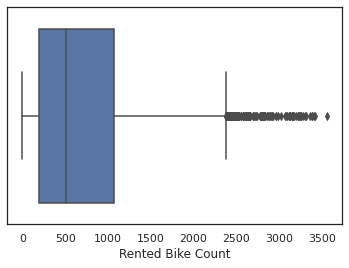

In [12]:
sns.boxplot(dataset_numeric['Rented Bike Count'])
plt.show()

In [13]:
Q1 = np.percentile(dataset_numeric['Rented Bike Count'], 25)
Q2 = np.percentile(dataset_numeric['Rented Bike Count'], 50)
Q3 = np.percentile(dataset_numeric['Rented Bike Count'], 75)

IQR = Q3-Q1
lower_limit = Q1 -1.5 * IQR
upper_limit = Q3 + 1.5 * IQR

print(lower_limit, upper_limit)

dataset_numeric = dataset_numeric[dataset_numeric['Rented Bike Count']<upper_limit]
dataset_numeric = dataset_numeric[dataset_numeric['Rented Bike Count']>lower_limit]

-1120.375 2376.625


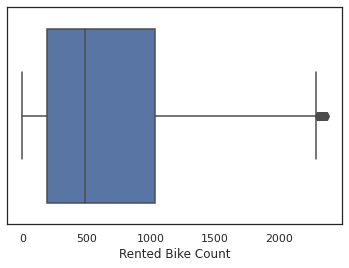

In [14]:
sns.boxplot(dataset_numeric['Rented Bike Count'])
plt.show()

**Hour**

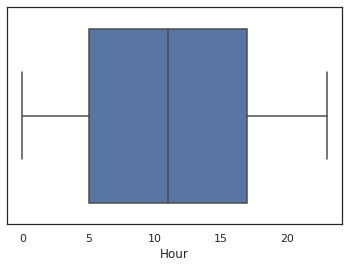

In [15]:
sns.boxplot(dataset_numeric['Hour'])
plt.show()

**Temperature(C)**

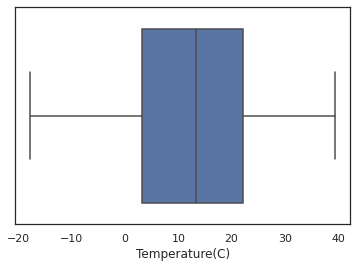

In [16]:
sns.boxplot(dataset_numeric['Temperature(C)'])
plt.show()

**Humidity(%)**

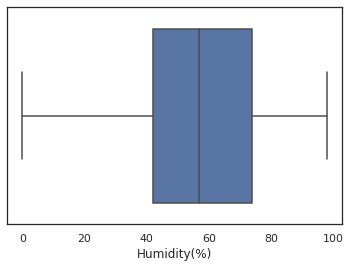

In [17]:
sns.boxplot(dataset_numeric['Humidity(%)'])
plt.show()

**Wind speed (m/s)**

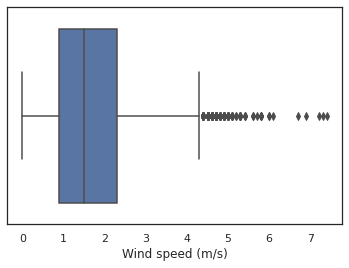

In [18]:
sns.boxplot(dataset_numeric['Wind speed (m/s)'])
plt.show()

In [19]:
Q1 = np.percentile(dataset_numeric['Wind speed (m/s)'], 25)
Q2 = np.percentile(dataset_numeric['Wind speed (m/s)'], 50)
Q3 = np.percentile(dataset_numeric['Wind speed (m/s)'], 75)

IQR = Q3-Q1
lower_limit = Q1 -1.5 * IQR
upper_limit = Q3 + 1.5 * IQR

print(lower_limit, upper_limit)

dataset_numeric = dataset_numeric[dataset_numeric['Wind speed (m/s)']<upper_limit]
dataset_numeric = dataset_numeric[dataset_numeric['Wind speed (m/s)']>lower_limit]

-1.1999999999999997 4.3999999999999995


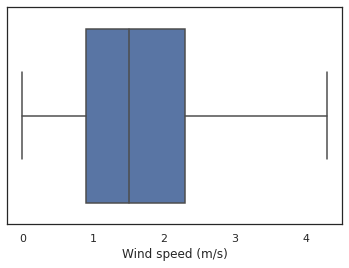

In [20]:
sns.boxplot(dataset_numeric['Wind speed (m/s)'])
plt.show()

**Visibility (10m)**

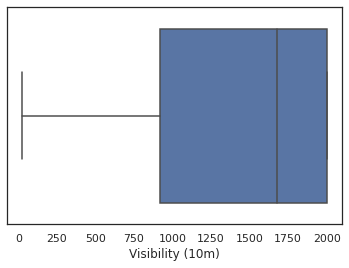

In [21]:
sns.boxplot(dataset_numeric['Visibility (10m)'])
plt.show()

**Dew point temperature(C)**

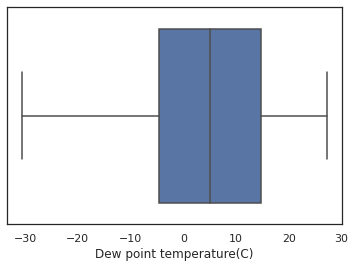

In [22]:
sns.boxplot(dataset_numeric['Dew point temperature(C)'])
plt.show()

**Solar Radiation (MJ/m2)**

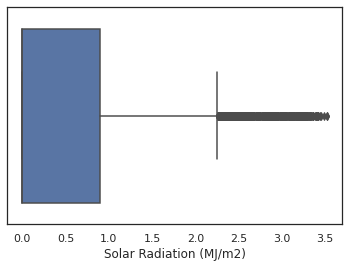

In [23]:
sns.boxplot(dataset_numeric['Solar Radiation (MJ/m2)'])
plt.show()

In [24]:
Q1 = np.percentile(dataset_numeric['Solar Radiation (MJ/m2)'], 25)
Q2 = np.percentile(dataset_numeric['Solar Radiation (MJ/m2)'], 50)
Q3 = np.percentile(dataset_numeric['Solar Radiation (MJ/m2)'], 75)

IQR = Q3-Q1
lower_limit = Q1 -1.5 * IQR
upper_limit = Q3 + 1.5 * IQR

print(lower_limit, upper_limit)

dataset_numeric = dataset_numeric[dataset_numeric['Solar Radiation (MJ/m2)']<upper_limit]
dataset_numeric = dataset_numeric[dataset_numeric['Solar Radiation (MJ/m2)']>lower_limit]

-1.35 2.25


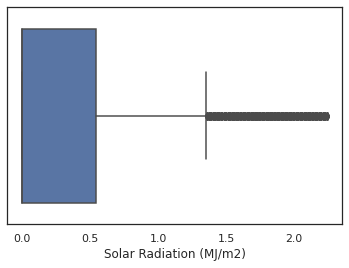

In [25]:
sns.boxplot(dataset_numeric['Solar Radiation (MJ/m2)'])
plt.show()

In [26]:
dataset_numeric.head()

,Rented Bike Count,Hour,Temperature(C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm)
0,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0
1,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0
2,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0
3,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0
4,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0


## **Identifying Categorical Variables**

In [27]:
print('Season_dummy = ', dataset['Seasons'].unique())
print('Holiday_dummy =', dataset['Holiday'].unique())
print('Functioning_day_dummy = ', dataset['Functioning Day'].unique())

Season_dummy =  ['Winter' 'Spring' 'Summer' 'Autumn']
Holiday_dummy = ['No Holiday' 'Holiday']
Functioning_day_dummy =  ['Yes' 'No']


## **Encoding Categorical Variables**

**Encoding Date**

In [28]:
import datetime
dataset['Date'] = pd.to_datetime(dataset['Date'])
dataset['Date'] = dataset['Date'].dt.strftime('%d/%m/%Y')
dataset['year'] = pd.DatetimeIndex(dataset['Date']).year
dataset['month'] = pd.DatetimeIndex(dataset['Date']).month
dataset['day'] = pd.DatetimeIndex(dataset['Date']).day
dataset['dayofyear'] = pd.DatetimeIndex(dataset['Date']).dayofyear
dataset['weekofyear'] = pd.DatetimeIndex(dataset['Date']).weekofyear
dataset['weekday'] = pd.DatetimeIndex(dataset['Date']).weekday
dataset['quarter'] = pd.DatetimeIndex(dataset['Date']).quarter
print(dataset.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 21 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Date                      8760 non-null   object 
 1   Rented Bike Count         8760 non-null   int64  
 2   Hour                      8760 non-null   int64  
 3   Temperature(C)            8760 non-null   float64
 4   Humidity(%)               8760 non-null   int64  
 5   Wind speed (m/s)          8760 non-null   float64
 6   Visibility (10m)          8760 non-null   int64  
 7   Dew point temperature(C)  8760 non-null   float64
 8   Solar Radiation (MJ/m2)   8760 non-null   float64
 9   Rainfall(mm)              8760 non-null   float64
 10  Snowfall (cm)             8760 non-null   float64
 11  Seasons                   8760 non-null   object 
 12  Holiday                   8760 non-null   object 
 13  Functioning Day           8760 non-null   object 
 14  year    

**Encoding dummies**

In [29]:
seasons = pd.get_dummies(dataset["Seasons"], drop_first= True)
holiday = pd.get_dummies(dataset["Holiday"], drop_first= True)
fun_day = pd.get_dummies(dataset["Functioning Day"], drop_first= True)

print(seasons.head(5))
print(holiday.head(5))
print(fun_day.head(5))

   Spring  Summer  Winter
0       0       0       1
1       0       0       1
2       0       0       1
3       0       0       1
4       0       0       1
   No Holiday
0           1
1           1
2           1
3           1
4           1
   Yes
0    1
1    1
2    1
3    1
4    1


In [30]:
dataset['Spring'] = seasons['Spring'].to_list()
dataset['Summer'] = seasons['Summer'].to_list()
dataset['Winter'] = seasons['Winter'].to_list()
dataset['Holiday_new'] = holiday['No Holiday'].to_list()
dataset['Functioning_Day'] = fun_day['Yes'].to_list()
dataset.head(10)

,Date,Rented Bike Count,Hour,Temperature(C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(C),Solar Radiation (MJ/m2),Rainfall(mm),...,day,dayofyear,weekofyear,weekday,quarter,Spring,Summer,Winter,Holiday_new,Functioning_Day
0,12/01/2017,254,0,-5.2,37,2.2,2000,-17.6,0.00,0.0,...,1,335,48,4,4,0,0,1,1,1
1,12/01/2017,204,1,-5.5,38,0.8,2000,-17.6,0.00,0.0,...,1,335,48,4,4,0,0,1,1,1
2,12/01/2017,173,2,-6.0,39,1.0,2000,-17.7,0.00,0.0,...,1,335,48,4,4,0,0,1,1,1
3,12/01/2017,107,3,-6.2,40,0.9,2000,-17.6,0.00,0.0,...,1,335,48,4,4,0,0,1,1,1
4,12/01/2017,78,4,-6.0,36,2.3,2000,-18.6,0.00,0.0,...,1,335,48,4,4,0,0,1,1,1
5,12/01/2017,100,5,-6.4,37,1.5,2000,-18.7,0.00,0.0,...,1,335,48,4,4,0,0,1,1,1
6,12/01/2017,181,6,-6.6,35,1.3,2000,-19.5,0.00,0.0,...,1,335,48,4,4,0,0,1,1,1
7,12/01/2017,460,7,-7.4,38,0.9,2000,-19.3,0.00,0.0,...,1,335,48,4,4,0,0,1,1,1
8,12/01/2017,930,8,-7.6,37,1.1,2000,-19.8,0.01,0.0,...,1,335,48,4,4,0,0,1,1,1
9,12/01/2017,490,9,-6.5,27,0.5,1928,-22.4,0.23,0.0,...,1,335,48,4,4,0,0,1,1,1


**Dropping encoded columns**

In [31]:
dataset = dataset.drop(columns=['Date', 'Seasons', 'Holiday', 'Functioning Day'])

In [32]:
dataset_cat = dataset.drop(columns=['Rented Bike Count',	'Hour',	'Temperature(C)',	'Humidity(%)',	'Wind speed (m/s)',	'Visibility (10m)',
                                    'Dew point temperature(C)',	'Solar Radiation (MJ/m2)',	'Rainfall(mm)',	'Snowfall (cm)'])
dataset_cat

,year,month,day,dayofyear,weekofyear,weekday,quarter,Spring,Summer,Winter,Holiday_new,Functioning_Day
0,2017,12,1,335,48,4,4,0,0,1,1,1
1,2017,12,1,335,48,4,4,0,0,1,1,1
2,2017,12,1,335,48,4,4,0,0,1,1,1
3,2017,12,1,335,48,4,4,0,0,1,1,1
4,2017,12,1,335,48,4,4,0,0,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...
8755,2018,11,30,334,48,4,4,0,0,0,1,1
8756,2018,11,30,334,48,4,4,0,0,0,1,1
8757,2018,11,30,334,48,4,4,0,0,0,1,1
8758,2018,11,30,334,48,4,4,0,0,0,1,1


**Merging Numerical and Encoded Categorical Variables**

In [33]:
dataset_cat[['Rented Bike Count',	'Hour',	'Temperature(C)',	'Humidity(%)',	'Wind speed (m/s)',	'Visibility (10m)',
                                    'Dew point temperature(C)',	'Solar Radiation (MJ/m2)',	'Rainfall(mm)',	'Snowfall (cm)']] = dataset_numeric[['Rented Bike Count',	'Hour',	'Temperature(C)',	'Humidity(%)',	'Wind speed (m/s)',	'Visibility (10m)',
                                    'Dew point temperature(C)',	'Solar Radiation (MJ/m2)',	'Rainfall(mm)',	'Snowfall (cm)']]
dataset_cat

,year,month,day,dayofyear,weekofyear,weekday,quarter,Spring,Summer,Winter,...,Rented Bike Count,Hour,Temperature(C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm)
0,2017,12,1,335,48,4,4,0,0,1,...,254.0,0.0,-5.2,37.0,2.2,2000.0,-17.6,0.0,0.0,0.0
1,2017,12,1,335,48,4,4,0,0,1,...,204.0,1.0,-5.5,38.0,0.8,2000.0,-17.6,0.0,0.0,0.0
2,2017,12,1,335,48,4,4,0,0,1,...,173.0,2.0,-6.0,39.0,1.0,2000.0,-17.7,0.0,0.0,0.0
3,2017,12,1,335,48,4,4,0,0,1,...,107.0,3.0,-6.2,40.0,0.9,2000.0,-17.6,0.0,0.0,0.0
4,2017,12,1,335,48,4,4,0,0,1,...,78.0,4.0,-6.0,36.0,2.3,2000.0,-18.6,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8755,2018,11,30,334,48,4,4,0,0,0,...,1003.0,19.0,4.2,34.0,2.6,1894.0,-10.3,0.0,0.0,0.0
8756,2018,11,30,334,48,4,4,0,0,0,...,764.0,20.0,3.4,37.0,2.3,2000.0,-9.9,0.0,0.0,0.0
8757,2018,11,30,334,48,4,4,0,0,0,...,694.0,21.0,2.6,39.0,0.3,1968.0,-9.9,0.0,0.0,0.0
8758,2018,11,30,334,48,4,4,0,0,0,...,712.0,22.0,2.1,41.0,1.0,1859.0,-9.8,0.0,0.0,0.0


In [34]:
columns = ['Rented Bike Count',	'Hour',	'Temperature(C)',	'Humidity(%)',	'Wind speed (m/s)',	'Visibility (10m)',
                                    'Dew point temperature(C)',	'Solar Radiation (MJ/m2)',	'Rainfall(mm)',	'Snowfall (cm)']
for column in columns:
    dataset_cat[column] = dataset_cat[column].fillna(dataset_cat[column].mean())

In [35]:
cols = list(dataset_cat.columns)
dataset_cat = dataset_cat[[cols[12]]+ cols[0:12] + cols[13:22]] 
dataset_cat.head()

,Rented Bike Count,year,month,day,dayofyear,weekofyear,weekday,quarter,Spring,Summer,...,Functioning_Day,Hour,Temperature(C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm)
0,254.0,2017,12,1,335,48,4,4,0,0,...,1,0.0,-5.2,37.0,2.2,2000.0,-17.6,0.0,0.0,0.0
1,204.0,2017,12,1,335,48,4,4,0,0,...,1,1.0,-5.5,38.0,0.8,2000.0,-17.6,0.0,0.0,0.0
2,173.0,2017,12,1,335,48,4,4,0,0,...,1,2.0,-6.0,39.0,1.0,2000.0,-17.7,0.0,0.0,0.0
3,107.0,2017,12,1,335,48,4,4,0,0,...,1,3.0,-6.2,40.0,0.9,2000.0,-17.6,0.0,0.0,0.0
4,78.0,2017,12,1,335,48,4,4,0,0,...,1,4.0,-6.0,36.0,2.3,2000.0,-18.6,0.0,0.0,0.0


## **Constructing Correlation Matrix**

In [36]:
from sklearn.model_selection import train_test_split
train, test = train_test_split(dataset_cat, test_size=0.25)

In [37]:
data_corr = train.corr()
data_corr

,Rented Bike Count,year,month,day,dayofyear,weekofyear,weekday,quarter,Spring,Summer,...,Functioning_Day,Hour,Temperature(C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm)
Rented Bike Count,1.000000,0.207624,0.150097,0.016122,0.149059,0.150438,-0.032586,0.156011,0.009523,0.275653,...,0.193268,0.401445,0.535345,-0.167641,0.109927,0.185086,0.380110,0.256585,-0.124415,-0.141726
year,0.207624,1.000000,-0.482177,-0.015752,-0.481625,-0.479074,-0.032221,-0.405031,0.176356,0.175071,...,-0.056305,-0.010870,0.370600,0.056588,-0.016990,0.044467,0.329867,0.097360,0.032146,-0.200880
month,0.150097,-0.482177,1.000000,0.018152,0.996523,0.996332,0.019094,0.971554,-0.422347,0.080792,...,-0.131994,0.010461,0.214317,0.125513,-0.143180,0.061952,0.225880,-0.000528,0.006310,0.059772
day,0.016122,-0.015752,0.018152,1.000000,0.101133,0.101243,-0.000274,0.017583,0.011738,-0.003479,...,0.066813,0.001389,0.000452,-0.028191,-0.012734,-0.091621,-0.011456,-0.005801,0.006196,0.103715
dayofyear,0.149059,-0.481625,0.996523,0.101133,1.000000,0.999818,0.018955,0.968273,-0.423506,0.078100,...,-0.126147,0.010547,0.210141,0.120773,-0.143122,0.054876,0.220509,-0.001317,0.006393,0.068984
weekofyear,0.150438,-0.479074,0.996332,0.101243,0.999818,1.000000,0.000003,0.968496,-0.423599,0.078519,...,-0.126795,0.010491,0.211540,0.121224,-0.143127,0.055396,0.221955,-0.000870,0.006803,0.068651
weekday,-0.032586,-0.032221,0.019094,-0.000274,0.018955,0.000003,1.000000,0.005759,-0.002909,0.008221,...,0.016753,0.002252,-0.006166,-0.006716,-0.013089,-0.017099,-0.013547,-0.010164,-0.016726,-0.005151
quarter,0.156011,-0.405031,0.971554,0.017583,0.968273,0.968496,0.005759,1.000000,-0.436670,0.082091,...,-0.133995,0.012536,0.219788,0.117588,-0.151516,0.083094,0.227209,0.000495,0.009057,0.053206
Spring,0.009523,0.176356,-0.422347,0.011738,-0.423506,-0.423599,-0.002909,-0.436670,1.000000,-0.332653,...,0.036270,0.001182,0.024929,0.062134,0.057838,-0.182404,0.038835,0.006304,0.022593,-0.094845
Summer,0.275653,0.175071,0.080792,-0.003479,0.078100,0.078519,0.008221,0.082091,-0.332653,1.000000,...,0.106206,-0.018709,0.605554,0.213322,-0.071972,0.048207,0.589841,0.074235,0.063481,-0.090614


In [38]:
data_corr = data_corr['Rented Bike Count'][1:]
data_corr[abs(data_corr)>=0.25].sort_values(ascending =False)

Temperature(C)              0.535345
Hour                        0.401445
Dew point temperature(C)    0.380110
Summer                      0.275653
Solar Radiation (MJ/m2)     0.256585
Winter                     -0.407571
Name: Rented Bike Count, dtype: float64

In [39]:
train = train[['Temperature(C)', 'Hour', 'Dew point temperature(C)', 'Summer', 
                'Winter','Rented Bike Count']]

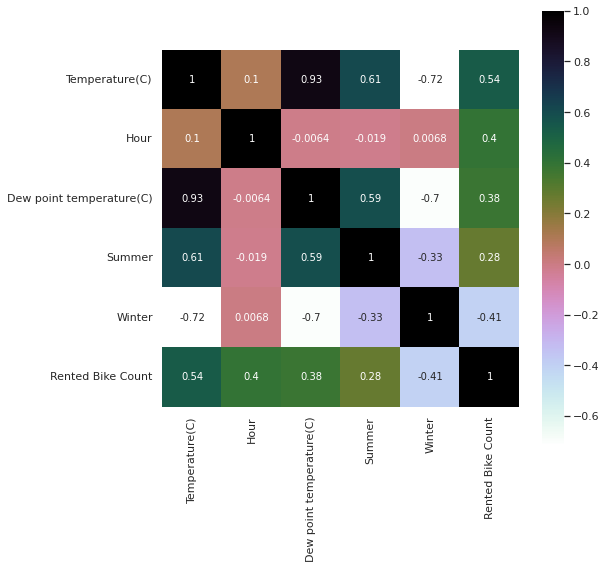

In [40]:
corr = train.corr()
plt.figure(figsize=(8,8))
sns.heatmap(corr, annot=True, cmap='cubehelix_r',square=True) 
plt.show()

## **Splitting Dataset into Training and Test set**

In [41]:
train_x = train.drop(['Rented Bike Count'], axis = 1)
train_y = train['Rented Bike Count']           
print('Dimension of train_x dataframe:',train_x.shape)
print('Dimension of train_y dataframe:',train_y.shape)

Dimension of train_x dataframe: (6570, 5)
Dimension of train_y dataframe: (6570,)


In [42]:
train.head()

,Temperature(C),Hour,Dew point temperature(C),Summer,Winter,Rented Bike Count
5581,11.778854,11.177396,3.68515,1,0,640.294156
140,1.200000,20.000000,0.30000,0,1,190.000000
4836,11.778854,11.177396,3.68515,1,0,640.294156
4417,19.200000,1.000000,10.40000,1,0,902.000000
5348,27.700000,20.000000,23.00000,1,0,2048.000000


In [49]:
test = test[['Temperature(C)', 'Hour', 'Dew point temperature(C)', 'Summer', 'Winter','Rented Bike Count']]
test.shape

(2190, 6)

In [44]:
test_x = test.drop(['Rented Bike Count'], axis = 1)
test_y = test['Rented Bike Count']           
print('Dimension of train_x dataframe:',test_x.shape)
print('Dimension of train_y dataframe:',test_y.shape)

Dimension of train_x dataframe: (2190, 5)
Dimension of train_y dataframe: (2190,)


## **Training Linear Regression model on the Training set**

In [45]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(train_x, train_y)

LinearRegression()

In [46]:
from sklearn.metrics import mean_squared_error,mean_absolute_error, r2_score

model_pred = regressor.predict(test_x)
model_score= regressor.score(test_x, test_y)
print('Model score is:', model_score)
print('R_Squared Score of linear regression:', r2_score(test_y, model_pred))

Model score is: 0.4524480627748634
R_Squared Score of linear regression: 0.4524480627748634


### Creating Sample Submission file 

In [47]:
submission_data = pd.DataFrame({'Id':test.index,'Pred_Bike_Count':model_pred})
submission_data
test_y = pd.DataFrame(test_y)
test_y['Predicted'] = submission_data['Pred_Bike_Count']

test_y

,Rented Bike Count,Predicted
4622,1075.0,NaN
1254,165.0,351.359555
2629,516.0,NaN
3905,24.0,NaN
7325,0.0,NaN
...,...,...
3775,389.0,NaN
6481,653.0,NaN
6604,255.0,NaN
5629,688.0,NaN


**Comment: **
The linear regression method and correlation model used do not fit the dataset. Need to change the model or fit with non-linear regression.

### **Ridge and Lasso for Increasing the Accuracy**

In [ ]:
from sklearn.linear_model import Ridge
ridge = Ridge()
ridge.fit(train_x, train_y)
ridge_score = ridge.score(test_x, test_y) 
print("Accuracy using ridge: ", ridge_score)

In [ ]:
from sklearn.linear_model import Lasso
lasso = Lasso()
lasso.fit(train_x, train_y)
lasso_score = lasso.score(test_x, test_y)
print("Accuracy using lasso: ", lasso_score)

**Comment: **
Since the model failed both Lasso and Ridge fitting check methods do not work. 